In [40]:
%matplotlib inline

In [41]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.image import BboxImage, imread
from matplotlib.transforms import Bbox
from PIL import Image
import seaborn as sns

In [42]:
mpl.rcParams["figure.dpi"] = 60
mpl.rcParams["savefig.dpi"] = 60
IMG_ROOT = "./images"

In [43]:
# read images
image_paths = os.listdir("./images")
image_paths = [os.path.join(IMG_ROOT, p) for p in image_paths]
images = [Image.open(p) for p in image_paths]

# make & read images
data = {
    "Optimization as a Model for Few-Shot Learning": 0.5,
    "Adversarially Regularized Autoencoders for Generating Discrete Structures": 1,
    "Train longer, generalize better: closing the generalization gap in large batch training of neural networks": 0.8
}

titles = []
values = []

for d in data:
    titles.append(d)
    values.append(data[d])

print(titles)
print(values)

['Optimization as a Model for Few-Shot Learning', 'Adversarially Regularized Autoencoders for Generating Discrete Structures', 'Train longer, generalize better: closing the generalization gap in large batch training of neural networks']
[0.5, 1, 0.8]


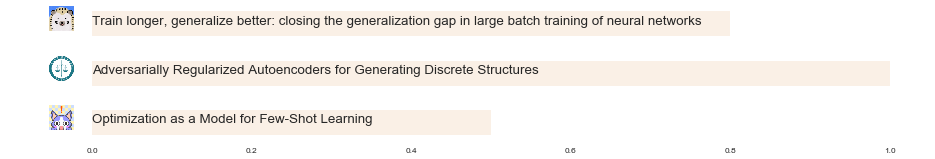

In [82]:
paper_count = len(values)
width = 0.5
figsize_v = (width * 2) * paper_count

fig, ax = plt.subplots(figsize=(18, figsize_v))
ax.patch.set_facecolor("white")
ax.barh(list(range(paper_count)), values, width, color="#faf0e6")
ax.grid("off")
ax.set_yticks([])
for p in ["top", "left", "right"]:
    ax.spines[p].set_visible(False)
for i, t in enumerate(titles):
    ax.text(0, i, t, fontsize=16)
    
TICK_POS = -1.25  # vertical position of icon in graph y-grid
SIZE_IN_TICK = width  # icon in graph y-grid

def get_icon_position_from_order_v(ax, order, icon_size, horizontal_position, offset=0):
    scale = ax.transData.transform((1, 1)) - ax.transData.transform((0, 0))
    x_scale = scale[1] / scale[0]

    pos = order + offset
    left =  (horizontal_position - SIZE_IN_TICK) * x_scale
    down =  pos - (SIZE_IN_TICK / 2)
    right = horizontal_position * x_scale
    top = pos + (SIZE_IN_TICK / 2)
    
    leftDown = ax.transData.transform((left, down))
    rightUpper = ax.transData.transform((right, top))

    return leftDown, rightUpper

for i, _y in enumerate(range(paper_count)):
    leftDown, rightUpper = get_icon_position_from_order_v(ax, i, SIZE_IN_TICK, TICK_POS)
    bbox_image = BboxImage(Bbox([leftDown, rightUpper]),
                           norm = None,
                           origin=None,
                           clip_on=False
                          )
    bbox_image.set_data(images[i])
    ax.add_artist(bbox_image)

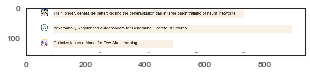

In [83]:
fig = ax.get_figure()
fig.savefig("text_plot.PNG", bbox_inches="tight")
with sns.axes_style("white"):
    plt.imshow(Image.open("text_plot.PNG"))